In [4]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, features, learning_rate, epochs, error_threshold=0.1):
      self.input_size = input_size
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.MSE = []
      self.weights =  np.random.uniform(-1,1,(input_size,features))
      self.biases = np.random.uniform(-1,1,features)
      self.error_threshold = error_threshold

    #взвешенная сумма
    def find_net(self, x):
        return np.dot(x, self.weights) + self.biases

    #softmax
    def activate(self, net):
        e_x = np.exp(net - np.max(net))
        return e_x / e_x.sum(axis=-1, keepdims=True)


    def fit(self, X, D):
      small_diff_count = 0
      correct_num = 0
      for j in range(self.epochs):
        loss=0
        for i in range(len(D)):
          x = X[i]
          y = D[i]
          net = self.find_net(x)
          y_output = self.activate(net)
          predicted = np.argmax(y_output)
          target = np.argmax(y)

          if target==predicted:
            correct_num +=1
            continue
          else:
            self.weights[:,target] += self.learning_rate * X[i]
            self.biases[target] += self.learning_rate

            self.weights[:,predicted] -= self.learning_rate * X[i]
            self.biases[predicted] -= self.learning_rate
          error = y_output - y
          loss += np.mean(error**2)

        self.MSE.append(loss / len(X))
        if self.MSE[-1]>=self.error_threshold:
            print(f"Значение общей ошибки в эпохе {j} превышает пороговое значение {self.error_threshold}")
            break
        if j>0 and abs(self.MSE[-2]- self.MSE[-1]<0.001):
            small_diff_count+=1
        if small_diff_count>3:
            print("Значение потерь меняется незначительно на протяжении нескольких эпох.")
            break

    def evaluate(self, X, y):
        correct_predictions = 0
        for i in range(len(X)):
            net = self.find_net(X[i])
            predict = self.activate(net)
            if np.argmax(predict) == np.argmax(y[i]):
                correct_predictions += 1
        return correct_predictions / len(X)

In [5]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2)

perceptron = Perceptron(input_size=x_train.shape[1], features=y_train.shape[1], learning_rate=0.5, epochs=10)
perceptron.fit(x_train, y_train)

Значение потерь меняется незначительно на протяжении нескольких эпох.


In [6]:
accuracy = perceptron.evaluate(x_test, y_test)

print(f"Точность на обучающей выборке: {accuracy * 100:.2f}%")

Точность на обучающей выборке: 69.79%


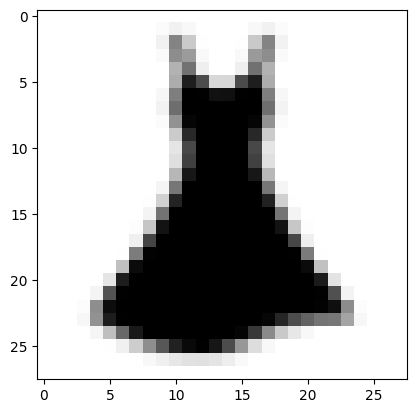

Результат: 3


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

test_image = plt.imread("/content/dress.png")


if len(test_image.shape) == 3:
    test_image = np.mean(test_image, axis=2)

test_image = resize(test_image, (28, 28))

test_image = (test_image / 255)

plt.imshow(test_image.reshape(28, 28), cmap="Greys")
plt.show()

image = np.reshape(test_image, (-1, 1))
linear_output = np.dot(perceptron.weights.T, image)
final_output = perceptron.activate(linear_output.T)
print(f"Результат: {final_output.argmax()}")